# Simple Graphs of Data
_Calvin Whealton_

In [81]:
import os
import pandas as pd
import geopandas as gpd
import folium
import branca
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# zip code shape file
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone/geo_data/tl_2019_us_zcta510')
county_geo = gpd.read_file('tl_2019_us_zcta510.shp')

In [4]:
# claims data
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone')
claims = pd.read_csv('ts_claims.csv')

In [6]:
county_geo.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327..."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ..."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."


In [8]:
county_geo['geometry']

0        POLYGON ((-83.70873 41.32733, -83.70815 41.327...
1        POLYGON ((-83.08698 41.53780, -83.08256 41.537...
2        MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ...
3        POLYGON ((-83.49650 41.25371, -83.48382 41.253...
4        POLYGON ((-83.22229 41.53102, -83.22228 41.532...
                               ...                        
33139    POLYGON ((-112.26022 40.76909, -112.25333 40.7...
33140    MULTIPOLYGON (((-111.92421 40.17034, -111.9240...
33141    POLYGON ((-110.00072 40.99745, -110.00036 40.9...
33142    POLYGON ((-111.92141 40.62772, -111.92134 40.6...
33143    POLYGON ((-111.59394 40.57707, -111.59386 40.5...
Name: geometry, Length: 33144, dtype: geometry

In [19]:
claims.head()

,Unnamed: 0,zips,1970,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,512.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
1,1,593.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
2,2,601.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
3,3,602.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,163468.72,0.0,0.0
4,4,603.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,7512.24,0.0,0.0,0.0,89270.14,0.0,0.0


In [23]:
cols_use = claims.columns[3:claims.shape[1]]
cols_use

Index(['1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object')

In [28]:
claims[cols_use].min(0).min(),claims[cols_use].max(0).max()

(-278.95, 1247542080.5800009)

In [35]:
claims['ID_TEMP'] = claims['zips'].astype(int).astype(str)
claims['GEOID10']  = claims['ID_TEMP'].apply(lambda x: '{0:0>5}'.format(x))
claims.head()

,Unnamed: 0,zips,1970,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,GEOID10,ID_TEMP
0,0,512.0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,00512,512
1,1,593.0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,00593,593
2,2,601.0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,00601,601
3,3,602.0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,163468.72,0.0,0.0,00602,602
4,4,603.0,0,0,0,0,0,0,0,0,...,0.0,7512.24,0.0,0.0,0.0,89270.14,0.0,0.0,00603,603


In [42]:
county_geo=county_geo.merge(claims, on='GEOID10')

In [43]:
county_geo['1972']

0        0
1        0
2        0
3        0
4        0
        ..
21258    0
21259    0
21260    0
21261    0
21262    0
Name: 1972, Length: 21263, dtype: int64

In [56]:
cols_plot = ['#eff3ff','#c6dbef','#9ecae1','#6baed6','#3182bd','#08519c']
def color_use(x):
    cols_vals = np.repeat('#FFFFFF',len(x))
    
    cols_vals[x > 1000] = cols_plot[0]
    cols_vals[x > 10000] = cols_plot[1]
    cols_vals[x > 100000] = cols_plot[2]
    cols_vals[x > 1000000] = cols_plot[3]
    cols_vals[x > 10000000] = cols_plot[4]
    cols_vals[x > 100000000] = cols_plot[5]
    
    return cols_vals
    

In [47]:
x = county_geo['1982']

In [53]:
cols_vals = np.repeat('#FFFFFF',len(x))

In [54]:
len(cols_vals)

21263

In [70]:
(vals,counts) = np.unique(cols,return_counts=True)

In [71]:
counts

array([   18,   195, 19304,   821,   925])

NameError: name 'savefig' is not defined

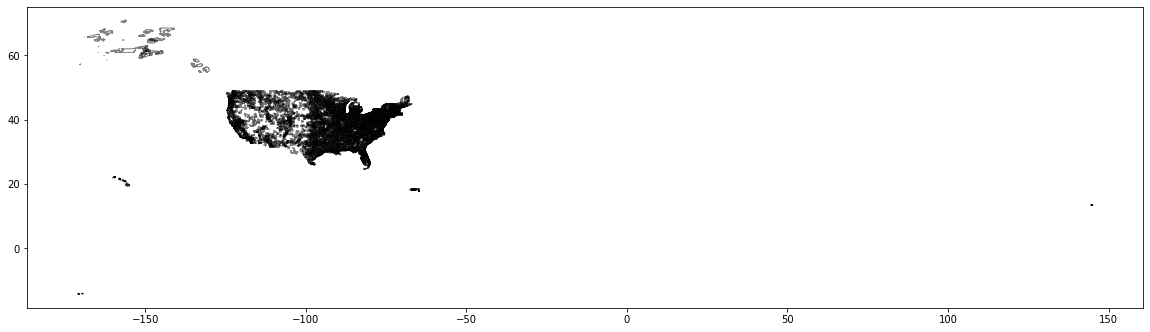

In [79]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone/figures')
for i in range(1972,1973):
    ind_claims = str(i)
    cols = color_use(county_geo['2000'])
    county_geo.plot(figsize=(20, 25), alpha=0.5, edgecolor='#00000030',color=cols)
    ax.set_xlim(-100,-75)
    ax.set_ylim(30,50)
    savefig('plot'+ind_claims+'.png')

In [60]:
max(county_geo['1972'])

0

In [4]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone')
zillow = pd.read_csv('Zillow_Sale_Prices_Zip.csv')

In [7]:
len(zillow['RegionID'].unique())

6430

In [8]:
zillow.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,61639,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,1218400.0,1024700.0,1031100.0,837800.0,965500.0,896100.0,873100.0,852000.0,869200.0,910000.0
1,84654,60657,Illinois,2,370100.0,391300.0,388700.0,382200.0,381300.0,378500.0,...,371300.0,398000.0,418200.0,424500.0,425700.0,411900.0,400500.0,390300.0,363800.0,380900.0
2,61637,10023,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,...,1127200.0,1227900.0,1142000.0,1145000.0,1049600.0,1014900.0,1044600.0,1142200.0,1051200.0,1136300.0
3,91982,77494,Texas,4,232000.0,240900.0,243000.0,255500.0,253400.0,259000.0,...,331900.0,328300.0,320900.0,315100.0,317500.0,315200.0,319000.0,313000.0,316900.0,NaN
4,84616,60614,Illinois,5,NaN,NaN,NaN,NaN,NaN,NaN,...,510300.0,490900.0,497300.0,468100.0,489700.0,484000.0,537700.0,566600.0,570900.0,555300.0


In [15]:
nulls = sum(zillow.isnull().sum())

In [13]:
total_possible = zillow.shape[0]*(zillow.shape[1]-4)

In [16]:
total_possible-nulls

651485

plot of housing data and floods

In [123]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone/housing_data')
zillow_annual = pd.read_csv('zillow_ann_pct_val.csv',dtype={"GEOID10": str})

In [124]:
zillow_annual.head()

,Unnamed: 0,GEOID10,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,10025,2.887944,8.217905,18.669590,23.808572,26.158283,15.601251,10.006530,19.408410,...,5.578219,1.031428,3.832615,10.766721,12.106670,6.953374,2.027546,-7.796744,7.609152,-8.309789
1,1,60657,2.897016,0.941087,14.059315,13.791164,15.496799,9.951738,5.892843,3.508507,...,-5.991398,-3.607538,1.072192,12.561107,2.293383,1.845443,4.622113,1.874155,0.299603,-1.911653
2,2,10023,3.401749,11.869158,8.898720,11.509083,19.845790,14.444325,10.707087,14.603707,...,5.214909,5.009036,4.004433,11.260714,9.563632,6.521192,1.114778,-0.868113,-4.472966,-1.718174
3,3,77494,0.603415,4.982120,-1.939980,6.252616,2.943694,-0.189139,1.038710,2.992066,...,-1.146031,-0.843243,2.820495,12.956694,8.652140,2.194048,-2.195965,0.721047,1.093913,-0.261549
4,4,60614,2.995216,-0.744847,13.284257,12.411750,14.255858,8.746532,6.089122,2.854710,...,-7.244492,-3.069757,1.911000,12.472574,3.416915,3.563913,3.609908,1.634308,0.209457,-1.813686


In [125]:
min(zillow_annual['GEOID10'])

'00501'

In [83]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone')
claims_data = pd.read_csv('ts_claims.csv')

In [87]:
claims_data['GEOID10'] = claims_data['zips'].astype(int).apply(lambda x: '{0:0>5}'.format(x))
claims_data.head()

,Unnamed: 0,zips,1970,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,GEOID10
0,0,512.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,00512
1,1,593.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,00593
2,2,601.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,00601
3,3,602.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,163468.72,0.0,0.0,00602
4,4,603.0,0,0,0,0,0,0,0,0,...,0.0,0.0,7512.24,0.0,0.0,0.0,89270.14,0.0,0.0,00603


In [ ]:
# finding "clean cases and taking difference in 2 years before and after flood"

In [91]:
claims_data_trimmed = claims_data.drop(columns=['1970','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994'])

In [92]:
claims_data_trimmed.head()

,Unnamed: 0,zips,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,GEOID10
0,0,512.0,0.0,3217.07,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,00512
1,1,593.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,00593
2,2,601.0,0.0,0.00,0.0,32150.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,00601
3,3,602.0,0.0,0.00,0.0,19598.21,0.0,0.0,0.0,14695.69,...,0.0,0.0,0.00,0.0,0.0,0.0,163468.72,0.0,0.0,00602
4,4,603.0,0.0,0.00,0.0,11772.71,0.0,4000.0,0.0,0.00,...,0.0,0.0,7512.24,0.0,0.0,0.0,89270.14,0.0,0.0,00603


In [126]:
claims_data_trimmed.set_index('GEOID10',inplace=True)

KeyError: "None of ['GEOID10'] are in the columns"

In [127]:
zillow_annual.set_index('GEOID10',inplace=True)

In [103]:
zillow_annual.head()

,Unnamed: 0,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
GEOID10,,,,,,,,,,,,,,,,,,,,,
10025,0,2.887944,8.217905,18.669590,23.808572,26.158283,15.601251,10.006530,19.408410,15.257715,...,5.578219,1.031428,3.832615,10.766721,12.106670,6.953374,2.027546,-7.796744,7.609152,-8.309789
60657,1,2.897016,0.941087,14.059315,13.791164,15.496799,9.951738,5.892843,3.508507,5.893613,...,-5.991398,-3.607538,1.072192,12.561107,2.293383,1.845443,4.622113,1.874155,0.299603,-1.911653
10023,2,3.401749,11.869158,8.898720,11.509083,19.845790,14.444325,10.707087,14.603707,14.709640,...,5.214909,5.009036,4.004433,11.260714,9.563632,6.521192,1.114778,-0.868113,-4.472966,-1.718174
77494,3,0.603415,4.982120,-1.939980,6.252616,2.943694,-0.189139,1.038710,2.992066,4.900205,...,-1.146031,-0.843243,2.820495,12.956694,8.652140,2.194048,-2.195965,0.721047,1.093913,-0.261549
60614,4,2.995216,-0.744847,13.284257,12.411750,14.255858,8.746532,6.089122,2.854710,5.351074,...,-7.244492,-3.069757,1.911000,12.472574,3.416915,3.563913,3.609908,1.634308,0.209457,-1.813686


In [112]:
claims_data_trimmed.index

Index(['00512', '00593', '00601', '00602', '00603', '00604', '00605', '00608',
       '00609', '00610',
       ...
       '99760', '99762', '99772', '99791', '99801', '99824', '99833', '99835',
       '99837', '99901'],
      dtype='object', name='GEOID10', length=24678)

In [128]:
zillow_annual.index

Index(['10025', '60657', '10023', '77494', '60614', '77449', '10002', '77084',
       '79936', '60640',
       ...
       '02714', '04109', '46912', '40404', '86343', '01470', '00822', '00831',
       '00802', '00820'],
      dtype='object', name='GEOID10', length=30478)

In [133]:
lister2 = list(set(list(claims_data_trimmed.index))&set(list(zillow_annual.index)))

In [134]:
len(lister2)

20504

In [135]:
zillow_annual.shape[0]

30478

In [136]:
claims_data_trimmed.shape[0]

24678

In [137]:
# creating data pairs for of data for plotting

In [149]:
df_claims_prices = pd.DataFrame(columns=['ind','zip','claim','yr_before','yr_after','yr'])
ind = 0
for i in lister2:
    for j in claims_data_trimmed.columns[4:len(claims_data_trimmed.columns)]:
        yr = j
        yr_val = int(j)
        yr_before = str(yr_val-1)
        yr_after = str(yr_val+1)
        claims = claims_data_trimmed.loc[i,j]
        zcode = i
        hp_before = zillow_annual.loc[i,yr_before]
        hp_after = zillow_annual.loc[i,yr_before]
        new_row = {'ind':ind, 
                   'zip':zcode, 
                   'claim':claims, 
                   'yr_before':yr_before, 
                   'yr_after':yr_after,
                   'yr':yr_val}
        
        df_claims_prices.append(new_row,ignore_index=True)
        

In [147]:
claims_data_trimmed.columns

Index(['Unnamed: 0', 'zips', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')

In [139]:
claims_data_trimmed.columns

Index(['Unnamed: 0', 'zips', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')

In [141]:
claims_data_trimmed.columns[2:len(claims_data_trimmed.columns)]

Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')